In [1]:
%load_ext hierarchymagic

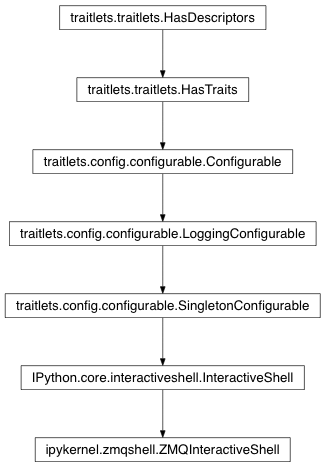

In [13]:
%hierarchy get_ipython()

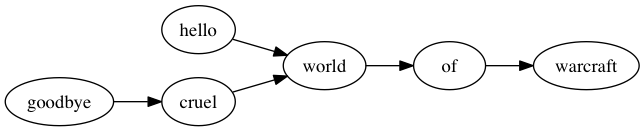

In [2]:
%%dot 

digraph G { 
    rankdir=LR;
    hello -> world;
    goodbye -> cruel -> world;
    world -> of -> warcraft;
}

In [9]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')
dot  #doctest: +ELLIPSIS

In [4]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [5]:
print(dot.source)  # doctest: +NORMALIZE_WHITESPACE

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


In [6]:
dot.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'

In [8]:
?dot.edge

In [12]:
Digraph?